In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,NaN,0.44,NaN,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	222
float64		column 2	74
float64		column 3	185
float64		column 4	37
float64		column 5	37
float64		column 6	0
float64		column 7	0
float64		column 8	37


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1262.000000,1410.000000,1299.000000,1447.000000,1447.000000,1484.000000,1484.000000,1447.000000
mean,0.498700,0.500496,0.500393,0.260995,0.504492,0.007500,0.499885,0.276040
std,0.135684,0.123909,0.086317,0.136473,0.047195,0.075683,0.057797,0.106471
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.480000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

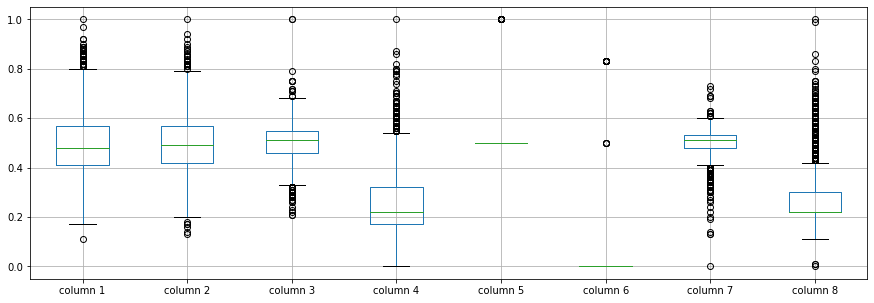

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.498700
column 2    0.500496
column 3    0.500393
column 4    0.260995
column 5    0.504492
column 6    0.007500
column 7    0.499885
column 8    0.276040
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.567361,-0.154154,0.131116,0.019595,-0.016589,0.069311,-0.153702
column 2,0.567361,1.000000,-0.262071,0.136919,0.040700,-0.000792,0.086395,-0.099366
column 3,-0.154154,-0.262071,1.000000,0.089400,-0.004015,0.019374,-0.181673,-0.031941
column 4,0.131116,0.136919,0.089400,1.000000,-0.011590,-0.012175,-0.113567,-0.061348
column 5,0.019595,0.040700,-0.004015,-0.011590,1.000000,-0.009222,0.041839,0.000017
column 6,-0.016589,-0.000792,0.019374,-0.012175,-0.009222,1.000000,0.020900,-0.035973
column 7,0.069311,0.086395,-0.181673,-0.113567,0.041839,0.020900,1.000000,0.091021
column 8,-0.153702,-0.099366,-0.031941,-0.061348,0.000017,-0.035973,0.091021,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+18,8+18+18,8+18+18+18,8+18+18+18+18,8+18+18+18+18+18,8+18+18+18+18+18+18,8+18+18+18+18+18,8+18+18+18+18,8+18+18+18,8+18+18,8+18,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.873825031778087
Epoch: 1 , loss: 2.531484303267106
Epoch: 2 , loss: 2.268112399007963
Epoch: 3 , loss: 2.103008233982584
Epoch: 4 , loss: 1.961202861174293
Epoch: 5 , loss: 1.8444862987684167
Epoch: 6 , loss: 1.7611735670462898
Epoch: 7 , loss: 1.689665269592534
Epoch: 8 , loss: 1.5923391736072043
Epoch: 9 , loss: 1.5581865647564763
Epoch: 10 , loss: 1.5046489057333574
Epoch: 11 , loss: 1.442861382080161
Epoch: 12 , loss: 1.4035629500513491
Epoch: 13 , loss: 1.3603539849105089
Epoch: 14 , loss: 1.3475820344427358
Epoch: 15 , loss: 1.3052120286485422
Epoch: 16 , loss: 1.2678826120884523
Epoch: 17 , loss: 1.2737515063389488
Epoch: 18 , loss: 1.2460376827613167
Epoch: 19 , loss: 1.2236034520294354
Epoch: 20 , loss: 1.2215863479220348
Epoch: 21 , loss: 1.1935224293366722
Epoch: 22 , loss: 1.2024650593166766
Epoch: 23 , loss: 1.1616706899974658
Epoch: 24 , loss: 1.1635086542886237
Epoch: 25 , loss: 1.14419

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.560024
column 2    0.440000
column 3    0.554310
column 4    0.220000
column 5    0.500000
column 6    0.000000
column 7    0.510000
column 8    0.220000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,-0.017654,0.0,-0.006198,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1479,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1480,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1481,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1482,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4.252185837546479, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.09065693344921609

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.61,0.470000,0.13,0.5,0.0,0.48,0.22
1,0.430000,0.67,0.480000,0.27,0.5,0.0,0.53,0.22
2,0.640000,0.62,0.490000,0.15,0.5,0.0,0.53,0.22
3,0.562346,0.44,0.563802,0.13,0.5,0.0,0.54,0.22
4,0.420000,0.44,0.480000,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.820000,0.63,0.470000,0.18,0.5,0.0,0.50,0.22
1480,0.350000,0.29,0.460000,0.14,0.5,0.0,0.54,0.66
1481,0.410000,0.47,0.500000,0.14,0.5,0.0,0.53,0.37
1482,0.510000,0.45,0.620000,0.25,0.5,0.0,0.59,0.22


In [20]:
imputations[-1].to_excel("Yeast_AN_5(imp).xlsx", index=False, header=False)